In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from src.utils import Data

In [32]:
# fault conditions
file1 = "data/combinedSimpleFaultLabeled.csv"
file2 = "data/combinedSimpleNormalLabeled.csv"

In [33]:
### create dataframe
DataObj1 = Data(file1)
df1 = DataObj1.ImportData()

### define input (X) and output (y) data
Vc_colnames = ["vc1","vc2","vc3","vc4","vc5","vc6","vc7","vc8"]
X_colnames = ["g1upper","g2upper","g3upper", "g4upper","g5upper","g6upper","g7upper","g8upper","i1","i2"]
y_colnames = ["vout"]
X1 = np.array(df1[X_colnames])[:2000,:]
y1 = np.array(df1[y_colnames])[:2000,:]

Vc_all1 = np.array(df1[Vc_colnames])[:2000,:]

In [34]:
### create dataframe
DataObj2 = Data(file2)
df2 = DataObj2.ImportData()

### define input (X) and output (y) data
Vc_colnames = ["vc1","vc2","vc3","vc4","vc5","vc6","vc7","vc8"]
X_colnames = ["g1upper","g2upper","g3upper", "g4upper","g5upper","g6upper","g7upper","g8upper","i1","i2"]
y_colnames = ["vout"]
X2_1 = np.array(df2[X_colnames])[:15000,:]
y2_1 = np.array(df2[y_colnames])[:15000,:]
X2_2 = np.array(df2[X_colnames])[15000:,:]
y2_2 = np.array(df2[y_colnames])[15000:,:]

Vc_all2_1 = np.array(df2[Vc_colnames])[:15000,:]
Vc_all2_2 = np.array(df2[Vc_colnames])[15000:,:]

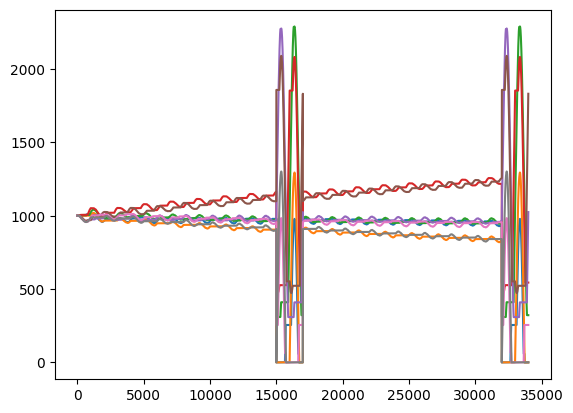

In [37]:
plt.plot(np.vstack((Vc_all2_1, Vc_all1, Vc_all2_2, Vc_all1)))

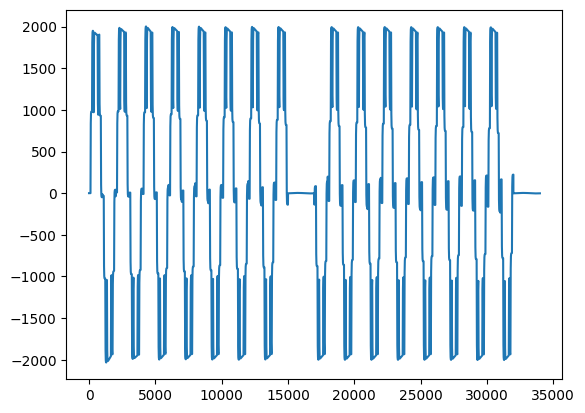

In [38]:
plt.plot(np.vstack((y2_1, y1,y2_2, y1)))

New dataset

In [39]:
X = np.vstack((X2_1, X1, X2_2, X1))
y = np.vstack((y2_1, y1, y2_2, y1))
Vc = np.vstack((Vc_all2_1, Vc_all1, Vc_all2_2, Vc_all1))

In [48]:
dict = {}
for i, n in enumerate(X_colnames):
    dict.update({n : X[:,i]})
for i, n in enumerate(Vc_colnames):
    dict.update({n : Vc[:,i]})
dict.update({y_colnames[0] : y.flatten()})

In [50]:
df = pd.DataFrame(dict)
# df.to_csv("data/combinedSimpleFaultComboLabeled.csv")